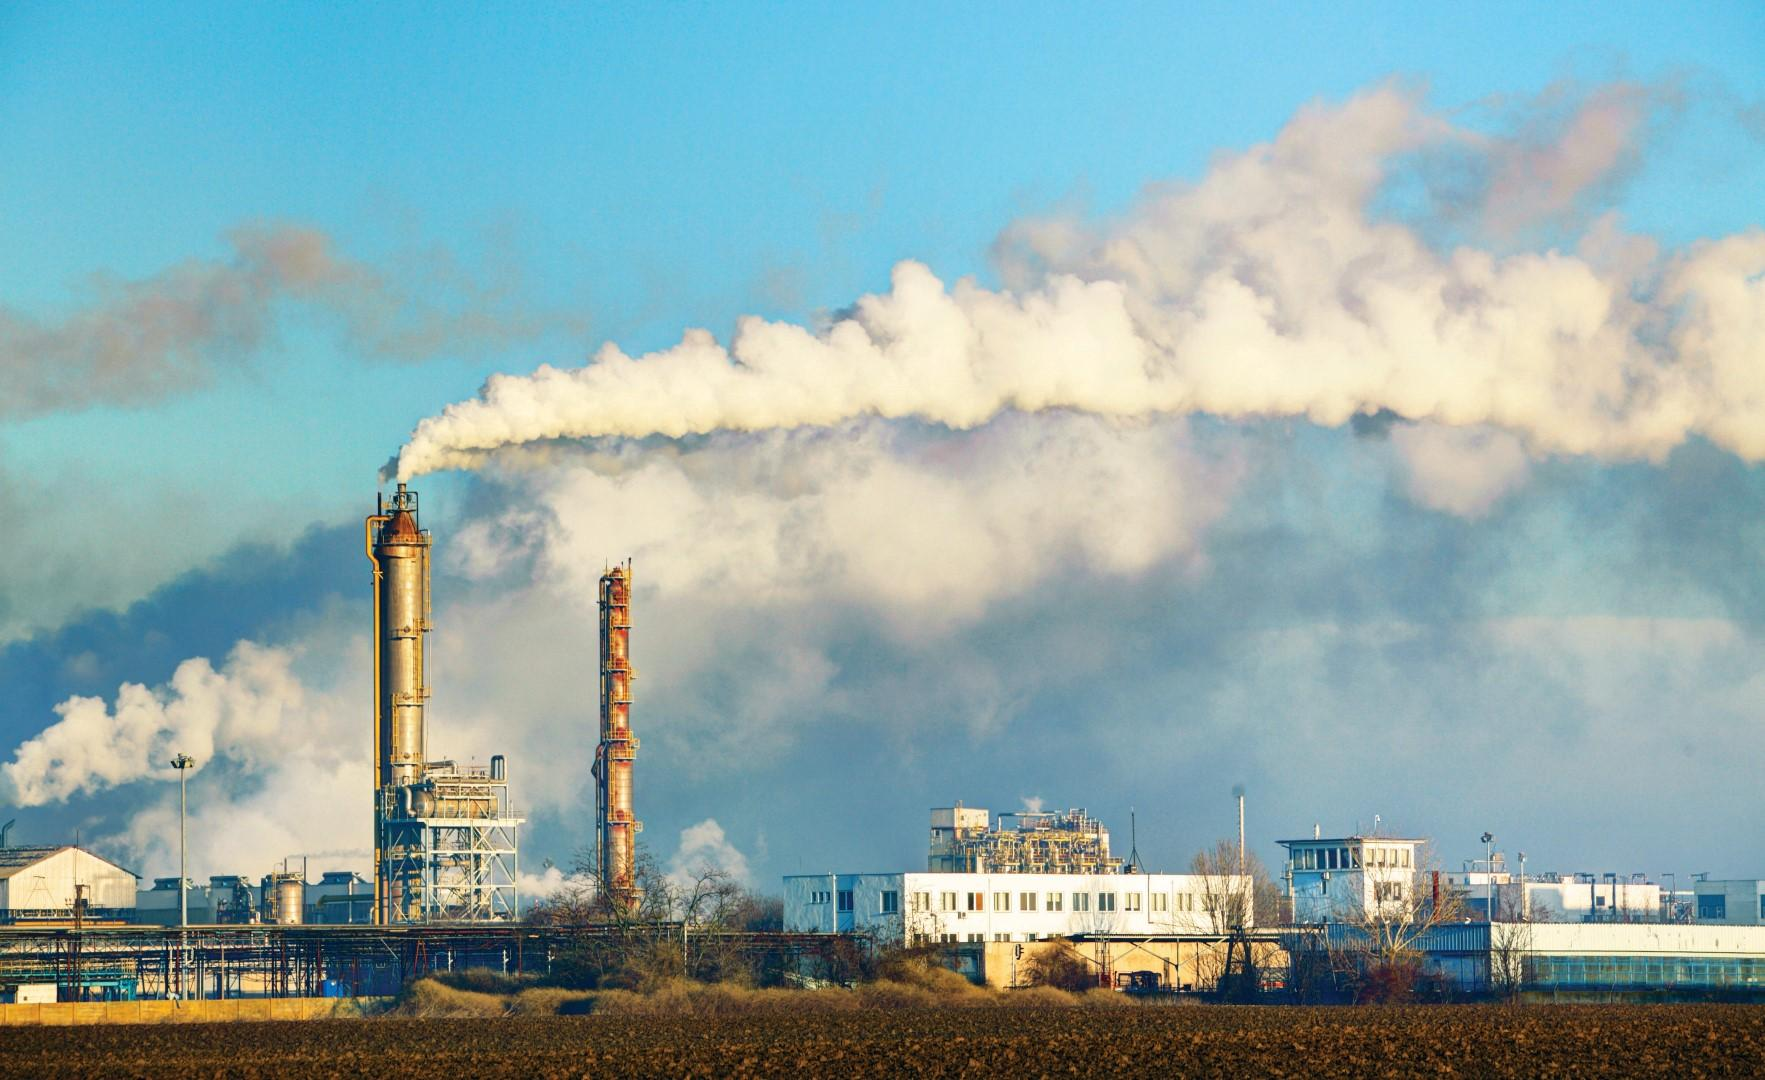

Air quality index (AQI) is a numerical scale used for reporting day to day air quality with regard to human health and the environment. The daily results of the index are used to convey to the public an estimate of air pollution level. An increase in air quality index signifies increased air pollution and severe threats to human health. In most cases, AQI indicates how clear or polluted the air in our surrounding is, and the associated health risks it might present. The AQI centers on the health effects that may be experienced within a few days or hours after breathing polluted air.

AQI calculations focus on major air pollutants including: particulate matter, ground-level ozone (O3), sulfur dioxide (SO2), nitrogen dioxide (NO2), and carbon monoxide (CO). Particulate matter and ozone pollutants pose the highest risks to human health and the environment. For each of these air pollutant categories, different countries have their own established air quality indices in relation to other nationally set air quality standards for public health protection.
But in our data, we have data about PM10, NO, NOx, NH3, Benzene, Toluene and Xylene also, which are also considered equally hazardous to our health.
Now we will start our analysis.

Here we will import the necessary modules, pandas, seaborn and matplotlib for visualizations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset and then looking at the first 5 rows of the dataset.

In [ ]:
d=pd.read_csv("../input/air-quality-data-in-india/city_day.csv")
data=pd.DataFrame(d)
data.head()

We will make all the changes in the copy of the data. We will try to preserve it for now, as we don't know, may be we may need the original dataset in future, so we will deal with the copy of the data.

In [ ]:
data_copy=data.copy()
data_copy.head()

Next we will look at the data type of the variables, so that we can have an idea of what kind of data we are dealing with, and also by looking at this we may decide whether any change needs to be done in the data type of the dataset or not. So from here we need to change the data type of the "Date" variable to datetime format, which we will do in the next cell. 

In [ ]:
data_copy.info()

Now we will convert the data type of "Date" column to datetime format

In [ ]:
data_copy["Date"]=pd.to_datetime(data_copy["Date"])
data_copy["Year"]=data_copy["Date"].dt.year

Here again we will check the data type of all the variables, as new varible has been added as "Year"

In [ ]:
data_copy.info()

Now we will check how many missing values are there in each column.

In [ ]:
data_copy.isnull().sum()

So from the above missing values from each column, we can see that column PM10, Xylene, Toluene, NH3 and Benezene to an extent has a bit more null values, so we will avoid those in our analysis, but for other variables we will replace the nulls with their respective mean values. 

In [ ]:
avg1=data_copy["PM2.5"].mean()
avg1
data_copy.fillna(value={"PM2.5":avg1},inplace=True)

In [ ]:
avg_NO2=data_copy["NO2"].mean()
avg_NO2
data_copy.fillna(value={"NO2":avg_NO2},inplace=True)

In [ ]:
avg_CO=data_copy["CO"].mean()
avg_CO
data_copy.fillna(value={"CO":avg_CO},inplace=True)

In [ ]:
avg_SO2=data_copy["SO2"].mean()
avg_SO2
data_copy.fillna(value={"SO2":avg_SO2},inplace=True)

In [ ]:
avg_O3=data_copy["O3"].mean()
avg_O3
data_copy.fillna(value={"O3":avg_O3},inplace=True)

In [ ]:
avg_NO=data_copy["NO"].mean()
avg_NO
data_copy.fillna(value={"NO":avg_NO},inplace=True)

In [ ]:
avg_NOx=data_copy["NOx"].mean()
avg_NOx
data_copy.fillna(value={"NOx":avg_NOx},inplace=True)

In [ ]:
avg_AQI=data["AQI"].mean()
data_copy.fillna(value={"AQI":avg_AQI},inplace=True)

**Now we will start our Data Exploration using Visualization**

In the below plot, we can see the frequency of the different city types present in the whole dataset.

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=data_copy,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In the below plot, we can see the frequency of all the city types for different "AQI_Bucket" variable, which are categorized as "Poor", "Very Poor", "Severe", "Moderate", "Satisfactory", "Good". It is basically so that we can get an idea of how frequency of different cities are distributed over "AQI_Bucket" variable. This will basically clear our idea about the data a bit more.

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=data_copy,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

Below plots will be a sequence of boxplots, and the intention is to show the distribution of all the non-nulls numerical variables over the cities.

In [ ]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=data_copy,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

In [ ]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=data_copy,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

In [ ]:
graph3=sns.catplot(x="City",y="O3",data=data_copy,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

In [ ]:
graph4=sns.catplot(x="City",y="SO2",data=data_copy,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

In [ ]:
graph5=sns.catplot(data=data_copy,kind="box",x="City",y="NOx",height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

In [ ]:
graph6=sns.catplot(data=data_copy,kind="box",x="City",y="NO",height=6,aspect=3)
graph6.set_xticklabels(rotation=90)

In the below plot, we are trying to see the frequencies of the different categories of the variable AQI_Bucket.

In [ ]:
graph7=sns.catplot(x="AQI_Bucket",data=data_copy,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

In the below plot my intention is show the distribution of categories of different AQI_Bucket variable over different cities, means what is the frequency of different categories of AQI_Bucket in different cities of India.

In [ ]:
graph8=sns.catplot(x="AQI_Bucket",kind="count",data=data_copy,col="City",col_wrap=4)
graph8.set_xticklabels(rotation=90)

The below heatmap is showing the mean value of different air pollutants in different cities, it is for comparison purpose for different cities, and it is for all the years. Below also there will be some heatmaps, but those will be for specific years.

In [ ]:
plt.figure(figsize=(12,10))
pivot=pd.pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"],data=data_copy)
sns.set(font_scale=1.2)
sns.heatmap(pivot,cmap="Reds",annot=True,cbar=False)

Only for the year 2020.

In [ ]:
plt.figure(figsize=(13,12))
pivot3=data_copy[data_copy["Year"]==2020].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot3,cmap="Reds",cbar=False,annot=True)

For the year 2019

In [ ]:
plt.figure(figsize=(13,12))
pivot4=data_copy[data_copy["Year"]==2019].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot4,cmap="Reds",cbar=False,annot=True)

For the year 2018

In [ ]:
plt.figure(figsize=(13,12))
pivot5=data_copy[data_copy["Year"]==2018].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot5,cmap="Reds",cbar=False,annot=True)

For the year 2017.

In [ ]:
plt.figure(figsize=(13,12))
pivot6=data_copy[data_copy["Year"]==2017].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot6,cmap="Reds",cbar=False,annot=True)

For the year 2016

In [ ]:
plt.figure(figsize=(13,12))
pivot7=data_copy[data_copy["Year"]==2016].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot7,cmap="Reds",cbar=False,annot=True)

For the year 2015.

In [ ]:
plt.figure(figsize=(13,12))
pivot8=data_copy[data_copy["Year"]==2015].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
sns.heatmap(pivot8,cmap="Reds",cbar=False,annot=True)

So in the above plots, we must have noticed that number of cities are reducing, and we don't know why is it happening, so we will try to find its answer in our next plots.

The below plot is the frequency of different cities in the year 2020.

In [ ]:
graph12=sns.catplot(data=data_copy[data_copy["Year"]==2020],x="City",kind="count",height=6,aspect=3)
graph12.set_xticklabels(rotation=90)

It is for frequency of cities for the year 2019.

In [ ]:
graph13=sns.catplot(data=data_copy[data_copy["Year"]==2019],x="City",kind="count",height=6,aspect=3)
graph13.set_xticklabels(rotation=90)

It is for frequency of cities for the year 2018.

In [ ]:
graph14=sns.catplot(data=data_copy[data_copy["Year"]==2018],x="City",kind="count",height=6,aspect=3)
graph14.set_xticklabels(rotation=90)

It is for the year 2017.

In [ ]:
graph15=sns.catplot(data=data_copy[data_copy["Year"]==2017],x="City",kind="count",height=6,aspect=3)
graph15.set_xticklabels(rotation=90)

It is for the year 2016.

In [ ]:
graph16=sns.catplot(data=data_copy[data_copy["Year"]==2016],x="City",kind="count",height=6,aspect=3)
graph16.set_xticklabels(rotation=90)

It is for the year 2015.

In [ ]:
graph17=sns.catplot(data=data_copy[data_copy["Year"]==2015],x="City",kind="count",height=6,aspect=3)
graph17.set_xticklabels(rotation=90)

**Now we will try to see the correlation of variables PM2.5, NO2, SO2, PM10, NOx and O3 with AQI with the help of scatter plot, and we will do it for all the different cities.**

The below is scatter plot between AQI and PM2.5 for different cities.

In [ ]:
sns.relplot(x="PM2.5",y="AQI",kind="scatter",data=data_copy,col="City",col_wrap=4,color="red")

The below plot is between variables AQI and NO2 for different cities.

In [ ]:
sns.relplot(x="NO2",y="AQI",kind="scatter",data=data_copy,col="City",col_wrap=4,color="green")

The below plot is between variables AQI and SO2.

In [ ]:
sns.relplot(x="SO2",y="AQI",kind="scatter",data=data_copy,col="City",col_wrap=4,color="blue")

The below plot is between variables AQI and PM10

In [ ]:
sns.relplot(x="PM10",y="AQI",kind="scatter",data=data_copy,col="City",col_wrap=4,color="orange")

The below plot is for the variable AQI and NOx

In [ ]:
sns.relplot(x="NOx",y="AQI",kind="scatter",data=data_copy,col="City",col_wrap=4,color="magenta")

**That's all for now, still have more ideas, just need to implement those also. **